# Air Quality Prediction Challange

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def readData(fileName):
    df=pd.read_csv(fileName)
    return df.values

In [3]:
data=readData('Train.csv')
print(type(data))

<class 'numpy.ndarray'>


In [4]:
print(data.shape)

(1600, 6)


In [ ]:
# hypothesis wale function me direct formula lgadete hain  theta transpose wala?
#  theta0 galat aaya hai, usko thik krna padega  acha

In [7]:
X=data[:,:5]
Y=data[:,5]
print(X.shape)
print(Y.shape)

(1600, 5)
(1600,)


In [17]:
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

# Algorithm

In [24]:
def hypothesis(theta,x):
   # x[0]=1
    m=x.shape[0]
#     n=x.shape[1]
    sum=0
    for i in range(m):
        sum+=(theta[i]*x[i])
    return sum
def error(theta,X,Y):
    m=X.shape[0]
#     n=X.shape[1]
    total_error=0
    for i in range(m):
#         for j in range(n):
        hx = hypothesis(theta,X[i])
        total_error+=((hx - Y[i])**2)
    return 0.5*total_error
def gradient(theta,X,Y):
    m=X.shape[0]
    n=X.shape[1]
    grad=np.zeros((n,))
    for i in range(n):
        for j in range(m):
            grad[i]+=((hypothesis(theta,X[j])-Y[j])*X[j][i])
    return grad
def gradientDescent(X,Y,learning_rate=0.001,max_itr=300):
    m=X.shape[0]
    n=X.shape[1]
    losses =  []
    theta=np.zeros((n,))
#     print(theta)
    for i in range(max_itr):
        e = error(theta,X,Y)
        losses.append(e)
        grad=gradient(theta,X,Y)
        theta=theta-learning_rate*grad

    return theta , losses

In [25]:
theta, losses = gradientDescent(X,Y)

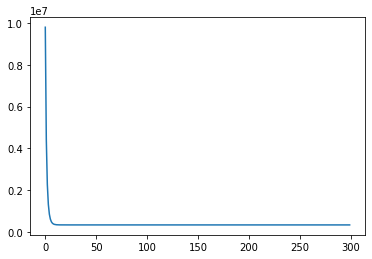

In [26]:
plt.plot(losses)

In [27]:

theta

array([ 4.99096674, 29.68187118, 92.66247759,  8.28062089, 44.76773522,
        2.51916121])

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#  yahan pe X pe ones append karne ki jarurt nahi thi :-p
lr.fit(X,Y)
print(lr.coef_)
print(lr.intercept_)

[ 0.         29.68187118 92.66247759  8.28062089 44.76773522  2.51916121]
4.990966736872126


In [40]:
test = readData("Test.csv")

In [41]:
ones = np.ones([test.shape[0],1])
test = np.concatenate((ones,test),axis=1)

In [ ]:
# iska use??
#  first column humesha 1 banana padta hai multivariate me

# are haaaaa i forgot as always shit
#  warna agar theta 0 ko multiply karege toh humesha 0 se hi multiply hoga,,, or uska koi essence nahi raggea
#  that's why last time sari values 4 km aari thi actual se,, kyoki intercept 4 add ni hora tha usme  :-p
# haa yar m bhulgyi 
# m bhi ab dusre resources ko krungi expllore kayi bar kuch topics ek jagah se smjh ni paati mai.
# anyway thanks a lot!!!! welcome yours ;-)
# btw i learn a lot from u every time so thanks for this tooo. 
#  kya bolu ab mai :-p lol koi nhi bs accept krte jao XD
# accepted ;


In [51]:
predictions=[]
for i in range(test.shape[0]):
    predictions.append((hypothesis(theta,test[i])))

In [52]:

predictions=np.array(predictions)
print(predictions.shape)

(400,)


In [53]:
id= np.arange(predictions.shape[0], dtype="float32")

In [56]:
result=np.stack((id,predictions),axis=1)

In [57]:
result_df=pd.DataFrame(result,columns=["Id","target"])


In [58]:
result_df.to_csv("result.csv",index=False)